<a href="https://colab.research.google.com/github/plaban1981/Multiclas-Classification-Imbalanced/blob/master/multiclass_classification_with_imbalanced_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification problems having multiple classes with imbalanced dataset present a different challenge than a binary classification problem. The skewed distribution makes many conventional machine learning algorithms less effective, especially in predicting minority class examples

https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a



https://github.com/javaidnabi31/Multi-class-with-imbalanced-dataset-classification/blob/master/20-news-group-classification.ipynb

## Applying Imbalanced Classification to 20 NewsGroup Dataset

- **Multiclass Classification:** A classification task with more than two classes; e.g., classify a set of images of fruits which may be oranges, apples, or pears. Multi-class classification makes the assumption that each sample is assigned to one and only one label: a fruit can be either an apple or a pear but not both at the same time.

- **Imbalanced Dataset:** Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally. For example, you may have a 3-class classification problem of set of fruits to classify as oranges, apples or pears with total 100 instances . A total of 80 instances are labeled with Class-1 (Oranges), 10 instances with Class-2 (Apples) and the remaining 10 instances are labeled with Class-3 (Pears). This is an imbalanced dataset and the ratio of 8:1:1. 




Most classification data sets do not have exactly equal number of instances in each class, but a small difference often does not matter. There are problems where a class imbalance is not just common, it is expected. For example, in datasets like those that characterize fraudulent transactions are imbalanced. 

The vast majority of the transactions will be in the “Not-Fraud” class and a very small minority will be in the “Fraud” class.

In [1]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

In [2]:
import pandas as pd
import numpy as np
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from pathlib import Path
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
# For reproducibility
np.random.seed(1237)

Using TensorFlow backend.


In [27]:
print(newsgroups_train.filenames.shape)
print(newsgroups_train.target.shape)
print(len(newsgroups_train.target))
print(newsgroups_train.target[:10])

(11314,)
(11314,)
11314
[ 7  4  4  1 14 16 13  3  2  4]


In [0]:
target = []
for f in newsgroups_train.target:
  target.append(newsgroups_train.target_names[f])

In [30]:
target[:10]

['rec.autos',
 'comp.sys.mac.hardware',
 'comp.sys.mac.hardware',
 'comp.graphics',
 'sci.space',
 'talk.politics.guns',
 'sci.med',
 'comp.sys.ibm.pc.hardware',
 'comp.os.ms-windows.misc',
 'comp.sys.mac.hardware']

In [0]:
filename = []
for f in newsgroups_train.filenames:
  name = f.split("/")
  filename.append(name[3]+"/"+ name[4]+"/"+name[5]+"/"+name[6])

In [42]:
filename[:10]

['20news_home/20news-bydate-train/rec.autos/102994',
 '20news_home/20news-bydate-train/comp.sys.mac.hardware/51861',
 '20news_home/20news-bydate-train/comp.sys.mac.hardware/51879',
 '20news_home/20news-bydate-train/comp.graphics/38242',
 '20news_home/20news-bydate-train/sci.space/60880',
 '20news_home/20news-bydate-train/talk.politics.guns/54525',
 '20news_home/20news-bydate-train/sci.med/58080',
 '20news_home/20news-bydate-train/comp.sys.ibm.pc.hardware/60249',
 '20news_home/20news-bydate-train/comp.os.ms-windows.misc/10008',
 '20news_home/20news-bydate-train/comp.sys.mac.hardware/50502']

In [0]:
news = []
for f in newsgroups_train.data:
  news.append(f)

In [13]:
news[:10]

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 

In [0]:
df = pd.DataFrame({'Filename':filename,'Category':target,'news':news})

In [44]:
df.head()

,Filename,Category,news
0,20news_home/20news-bydate-train/rec.autos/102994,rec.autos,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,20news_home/20news-bydate-train/comp.sys.mac.h...,comp.sys.mac.hardware,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,20news_home/20news-bydate-train/comp.sys.mac.h...,comp.sys.mac.hardware,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,20news_home/20news-bydate-train/comp.graphics/...,comp.graphics,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,20news_home/20news-bydate-train/sci.space/60880,sci.space,From: jcm@head-cfa.harvard.edu (Jonathan McDow...


In [45]:
df.Category.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
sci.med                     594
rec.autos                   594
sci.space                   593
comp.windows.x              593
sci.electronics             591
comp.os.ms-windows.misc     591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: Category, dtype: int64

## Visualize the News Category

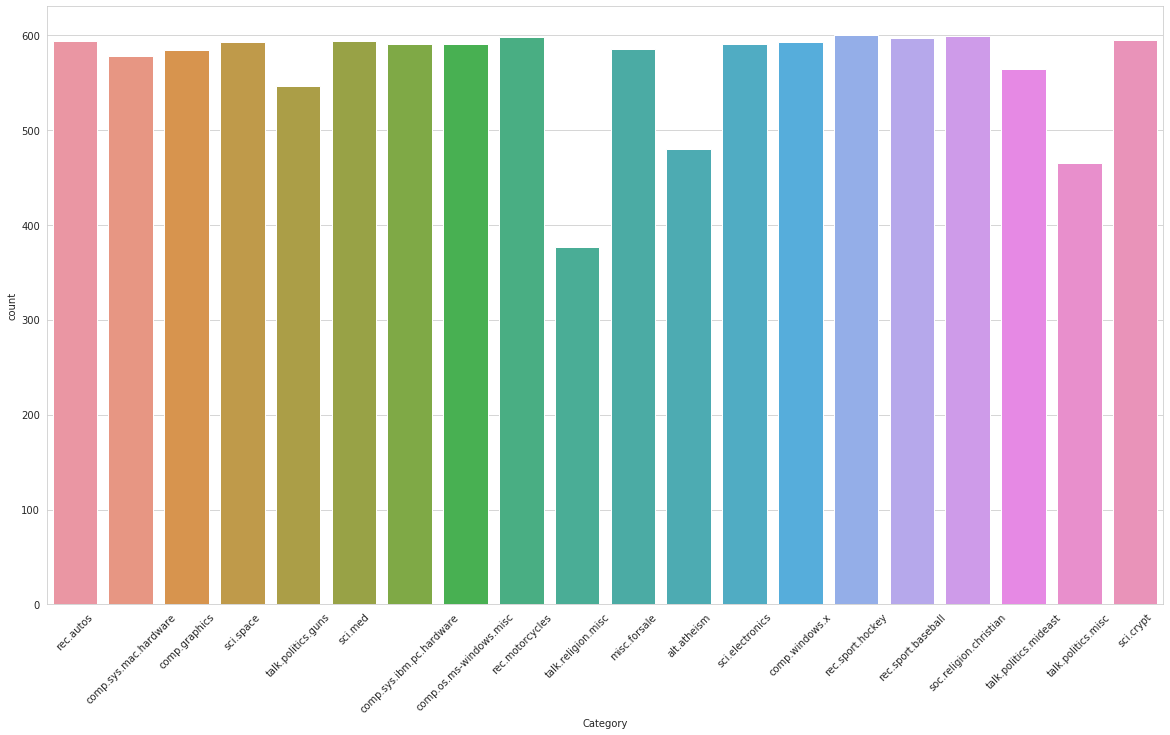

In [53]:
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(20,11))
plt.xticks(rotation=45)
sns.countplot(x='Category',data=df)

##create class imbalance

In [0]:
data_imb = df.copy()

In [0]:
for i in range(1,6):
    for index, row in data_imb.iterrows():
        if((row["Category"] == "alt.atheism"   or row["Category"] == "talk.politics.misc" 
            or row["Category"] =="soc.religion.christian" or row["Category"] == "talk.politics.mideast")and (index % 3) == 0):
            data_imb.drop(index, inplace=True)
        elif((row["Category"] == "comp.os.ms-windows.misc"  or row["Category"] == "comp.sys.ibm.pc.hardware" or row["Category"] == "comp.graphics" 
            or row["Category"] =="comp.windows.x" or row["Category"] == "comp.sys.mac.hardware")and (index % 4) == 0):
            data_imb.drop(index, inplace=True)
        elif((row["Category"] == "sci.med"  or row["Category"] == "sci.space" or row["Category"] == "sci.electronics" 
            or row["Category"] =="sci.crypt" or row["Category"] == "misc.forsale") and (index % 5) == 0):
            data_imb.drop(index, inplace=True)

    data_imb.reset_index(drop = True, inplace=True)

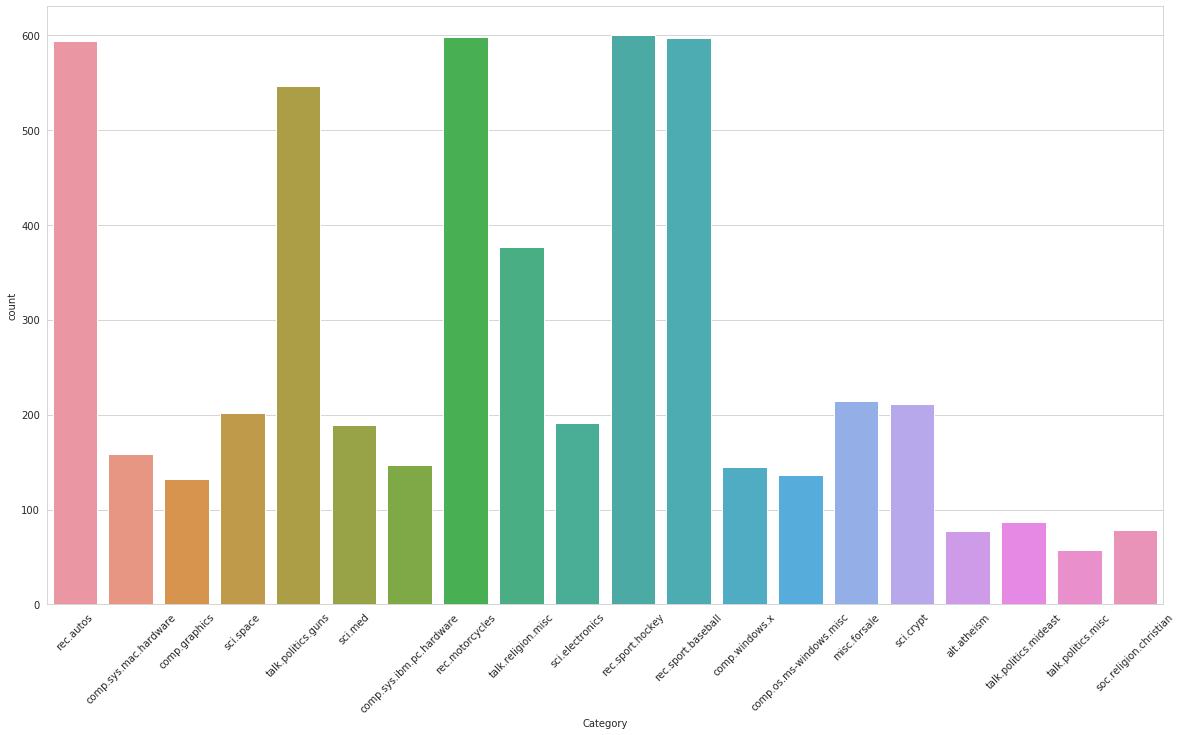

In [60]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,11))
plt.xticks(rotation=45)
sns.countplot(x='Category',data=data_imb)

#### The target / Category has now been made imbalanced.